## **Advances in Data Mining**

Stephan van der Putten | (s1528459) | stvdputtenjur@gmail.com  
Theo Baart | s2370328 | s2370328@student.leidenuniv.nl

### **Assignment 3**
This assignment is concerned with performing an analysis of and execute PageRank on the wikipedia links given in the `wikilink_graph.2004-03-01.csv` file. In order to do this the assignment is split up into four subtasks with each subtask receiving its dedicated `.ipynb` file. See each specific file for details on what this notebook accomplishes.

Note all implementations are based on the assignment guidelines and helper files given as well as the documentation of the used functions. 

#### **PageRank Algorithm (Improved)**
This notebook executes the PageRank algorithm using the improved storage method and algorithm as presented in the lecture (see also slide 18 of the instructional slideset). Additionally, some basic analaysis is performed and the results are compared to the "Sparse" implementation of PageRank.

**IMPORTANT! Please run `prep.ipynb` before running this notebook so that the required input files can be generated.**
___

### **Helper Functions**
This section contains functions which aid and simplify the code.
___
The following snippet handles all imports.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.sparse
from scipy.sparse import csr_matrix
from collections import defaultdict
from sklearn.preprocessing import normalize
import time

### **PageRankCustom Class**

This section contains the class and functions responsible for the implementation of the PageRank algorithm as shown on slide 17 of the instructional slideset. Due to the limitations of `.ipynb` files the various functions will be described first and then the implementation will be shown.

___
The `__init__` function initializes the class.

In order to do this the function uses the following (optional) parameters:
  * `prepped_dataset` - the prepared link data [default: None]
  * `converted_dataset` - the converted link data [default: None]
  * `normalized_dataset` - the normalized link data [default: None]
___
The `load_prepped_data` function is responsible for retrieving the data prepped by `prep.ipynb` and loading it for exploratory data analysis.

In order to do this the function uses the following parameter:
  * `filename` - the name of the file containing the prepped data [default: `prep_data.npz`]
___
The `convert_to_custom_format` function is responsible for converting the transition matrix from a sparse matrix representation to the custom format specified in slide 17 of the instructional slideset. It is assumed that the in the sparse matrix each (nonempty) column represents a source node.
___
The `initialize_pagerank` function initializes the vectors and variables needed for pagerank.

In order to do this the function uses the following parameter:
  * `beta` - the value to use for Beta [default: `0.8`]
___
The `pagerank_iteration` function is responsible for executing a single iteration of PageRank using the sparse matrix implementation. 
___
The `run_pagerank` function runs page rank until the maximum number of iterations has been reached.

In order to do this the function uses the following parameter:
  * `max_iterations` - the maximum number of iterations to execute [default: `25`]
___  
The `analyze_mse` function plots the mse of the various PageRank iterations. 
___
The `analyze_runtimes` function plots the runtimes of the various PageRank iterations. 

In [35]:
class PageRankCustom():
    def __init__(self,prepped_dataset=None,converted_dataset=None,normalized_dataset=None):
        self.prepped_dataset = prepped_dataset
        self.converted_dataset = converted_dataset
        self.normalized_dataset = normalized_dataset
    
    def load_prepped_data(self,filename = 'prep_data.npz'):
        self.prepped_dataset = scipy.sparse.load_npz(filename) 
        
    def convert_to_custom_format(self):
        indices = self.prepped_dataset.nonzero()
        dictionary = defaultdict(list)
        np_degree = []

        for source, destination in zip(indices[1], indices[0]):
            dictionary[source].append(destination)

        for source,destination in dictionary.items():
            np_degree += [[source,len(destination),np.array(destination, dtype=np.int32)]]

        self.converted_dataset = np.array(np_degree)
        
    def initialize_pagerank(self,beta=0.8):
        self.beta = 0.8
        self.mse = []
        self.runtimes = []
        self.normalized_dataset = normalize(self.prepped_dataset, norm='l1', axis=0)
        self.N = self.prepped_dataset.shape[0]
        
        self.v_old = np.repeat(1.0 / self.N , self.N)
        self.v_new = np.repeat((1-self.beta) / self.N, self.N)

    def pagerank_iteration(self):
        self.v_new = np.repeat((1-self.beta) / self.N, self.N)
        for i in range(len(self.converted_dataset)):
            degree = self.converted_dataset[i,[1]]
            destinations = self.converted_dataset[i,[2]]
            for destination in destinations[0]:
                self.v_new[destination] += self.beta * self.v_old[i] / degree
        self.mse.append(((self.v_new - self.normalized_dataset * self.v_new)**2).mean())
        self.v_old = self.v_new.copy()
        
    def run_pagerank(self,max_iterations=25):
        for i in range(max_iterations):
            start = time.time()
            self.pagerank_iteration()
            end = time.time()
            self.runtimes.append(np.round(end - start,4))
            
    def analyze_mse(self):
        x_axis = list(range(len(self.mse)))
        y_axis = self.mse
        plt.plot(x_axis, y_axis)
        plt.xlabel('Iterations')
        plt.ylabel('MSE')
        plt.title('MSE over iterations')
        plt.ylim(bottom=0)
        plt.show()
        print(f'The minimum MSE is {min(self.mse)}.')        
        
    def analyze_runtimes(self):
        x_axis = list(range(len(self.runtimes)))
        y_axis = self.runtimes
        plt.plot(x_axis, y_axis)
        plt.xlabel('Iterations')
        plt.ylabel('Runtime (s)')
        plt.title('Runtime over iterations')
        plt.show()
        average = np.mean(self.runtimes)
        print(f'The average runtime is {average} seconds.')     

### **Program Execution**
This section is concerned with parsing the input arguments and determining the execution flow of the program.
___
The `main` function handles the command line arguments and is responsible for the main flow of the program.

In order to do this the function uses the following parameters:
  * `path` - the location for the link data file [default: `prep_data.npz`]
  * `beta` - the Beta value to use [default: `0.8`]
  * `max_iter` - the maximum number of iterations to execute [default: `25`]

In [36]:
def main(path = 'prep_data.npz', beta=0.8,max_iter=25):
    pagerank = PageRankCustom()
    pagerank.load_prepped_data(path)
    pagerank.convert_to_custom_format()
    
    pagerank.initialize_pagerank(beta=beta)
    pagerank.run_pagerank()
    
    pagerank.analyze_mse()
    print('\n')
    pagerank.analyze_runtimes()

The following snippet triggers the manual execuation of the program

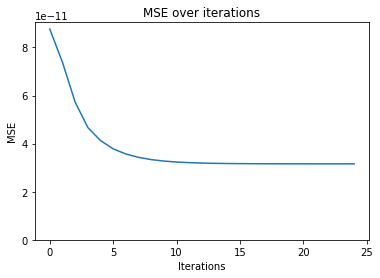

The minimum MSE is 3.158419811711861e-11.




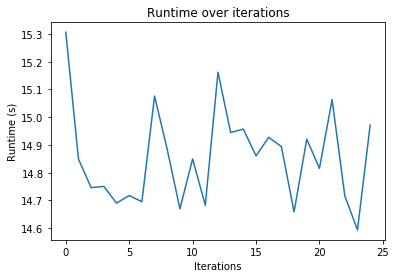

The average runtime is 14.856224 seconds.


In [37]:
# main()

The following snippet passes the start of the program and the command line arguments to the `main` function.

The following command line argument is expected:
  * `path` - the location of the `prep_data.npz` file
  * `beta` - the beta value to use
  * `max_iter` - the maximal number of Pagerank iterations

In [ ]:
if __name__ == "__main__":
    filepath = sys.argv[1]
    beta = sys.argv[2]
    max_iter = sys.argv[3]
    main(path=filepath,beta=beta,max_iter=max_iter)

### **Discussion**

When comparing the results of the "custom" implementation in this notebook and the "sparse" implementation in the `sparse.ipynb` notebook we can observe that, in general the results are quite similar, but that in the details there are major differences. We can see from the graphs in `sparse.ipynb` and `PageRank.ipynb` that both do succeed in reducing the MSE and getting better results with MSE's that approach zero as the number of iterations increases. However, the "sparse" implementation has a lower minimum MSE. Potentially, increasing the maximum number of iterations could allow the "custom" implementation to get the upper-hand, however, additional testing would be needed to verify this. Do note that both implementations have very small MSE's and could both be usable depending on whether runtime or RAM usage is more important. 

Comparing the two in detail we can see the following differences between the two implementations:

| Metric | Sparse | Custom |
|-----|-----|----|
| minimum MSE | 1.777e-12 | 3.158e-11 |
| RAM | 52.682MB | 15.652MB |
| Runtime / iteration | 0.018s | 14.856s |

As is evident in the table above, the "sparse" implementation outperforms the "custom" implementation on all major facets except for RAM. When considering what causes these differences we have come to the following conclusions:
  1. The MSE for the "sparse" variant could potentially be better as it address all probabilities at once as opposed to sequentially tackling each source/destination pair. We are, however, unsure of this.
  2. The storage requirements for the "custom" variant are much smaller as it only stores `average_number_of_links` + 2 values as opposed to twice the `average_number_of_links` values. 
  3. The Matrix algebra used in the "sparse" variant allows for significantly faster iterations compared to the double loop in the "custom" variant.